In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
#own functions
import functions as f

#accessing aws data
import sys
sys.path.append('../utils')
from db_utils import DBUtil 

#for ipython display
import matplotlib.pyplot as plt
from IPython.display import display, HTML
%matplotlib inline
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
#connect to aws
dbu = DBUtil("komodo_redshift","../../databases/database.conf")

In [3]:
%%time
query = """
select ilink,
count(*) as N_Dresses2018 
from jjill.jjill_keyed_data
where is_emailable_ind='Y'
and department_name = 'Dresses'
and order_date between '2018-01-01' and '2018-04-30'
group by 1 order by 1;
"""
DF3 = dbu.get_df_from_query(query)
DF3.columns = map(str.upper,DF3.columns)

CPU times: user 176 ms, sys: 82.2 ms, total: 258 ms
Wall time: 7.1 s


In [4]:
DF1 = pd.read_pickle('../data/numeric_fts_2017.pkl')
DF2 = pd.read_pickle('../data/categorical2017.pkl')
DF1.columns = map(str.upper, DF1.columns)
DF2.columns = map(str.upper, DF2.columns)

In [5]:
DF = DF1.merge(DF2,on=['ILINK','DEPARTMENT_NAME'])
DF = DF.merge(DF3,how='outer',on='ILINK')

In [6]:
DF['N_DRESSES2018'].fillna(0,inplace=True)

In [22]:
DF4 = DF[DF.DEPARTMENT_NAME=='Dresses']
X = ['%s_2017'%x for x in DF4.columns[2:-1]]
X.insert(0,'ILINK')
X.insert(1,'DEPARTMENT_NAME')
X.insert(42,'N_DRESSES2018')
DF4.columns = X
print 'Distinct # of Customers in who purchased Dresses in 2017:',DF4.shape[0]

Distinct # of Customers in who purchased Dresses in 2017: 37995


In [12]:
NUMERIC_FTS = ['TOTAL_BOUGHT_2017',
             'SHIPPED_SOLD_AMT_2017',
             'AVG_SHIPPED_SOLD_AMT_2017',
             'STD_SHIPPED_SOLD_AMT_2017',
             'VAR_SHIPPED_SOLD_AMT_2017',
             'DISCOUNT_2017',
             'AVG_DISCOUNT_2017',
             'STD_DISCOUNT_2017',
             'VAR_DISCOUNT_2017',
             'N_DRESSES2018']
CATEG_FTS = ['ENDUSE_HAS_CORE_2017',
             'ENDUSE_HAS_WEAREVER_2017',
             'ENDUSE_HAS_PUREJILL_2017',
             'PAYTYPE_HAS_JJC_2017',
             'PAYTYPE_HAS_VISA_2017',
             'PAYTYPE_HAS_MC_2017',
             'PAYTYPE_HAS_AMEX_2017',
             'PAYTYPE_HAS_DISC_2017',
             'PAYTYPE_HAS_DEBIT_2017',
             'PAYTYPE_HAS_CASH_2017',
             'PAYTYPE_HAS_CK_2017',
             'PAYTYPE_HAS_OTHER_2017',
             'FABRICCATEGORY_HAS_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_HAS_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_HAS_LINEN/LINENBL_2017',
             'ENDUSE_%_CORE_2017',
             'ENDUSE_%_WEAREVER_2017',
             'ENDUSE_%_PUREJILL_2017',
             'PAYTYPE_%_JJC_2017',
             'PAYTYPE_%_VISA_2017',
             'PAYTYPE_%_MC_2017',
             'PAYTYPE_%_AMEX_2017',
             'PAYTYPE_%_DISC_2017',
             'PAYTYPE_%_DEBIT_2017',
             'PAYTYPE_%_CASH_2017',
             'PAYTYPE_%_CK_2017',
             'PAYTYPE_%_OTHER_2017',
             'FABRICCATEGORY_%_COTTON/COTTONBL_2017',
             'FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017',
             'FABRICCATEGORY_%_LINEN/LINENBL_2017','N_DRESSES2018']
CATEG_FTS = map(str.upper,CATEG_FTS)

# Dresses Customers Only

## Numeric Fts Correlations/Scatter Matrix

,TOTAL_BOUGHT_2017,N_DRESSES2018
TOTAL_BOUGHT_2017,1.00000,0.44526
N_DRESSES2018,0.44526,1.00000


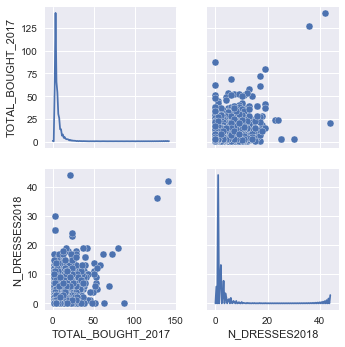

In [13]:
fts = [NUMERIC_FTS[0]]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,SHIPPED_SOLD_AMT_2017,AVG_SHIPPED_SOLD_AMT_2017,STD_SHIPPED_SOLD_AMT_2017,VAR_SHIPPED_SOLD_AMT_2017,N_DRESSES2018
SHIPPED_SOLD_AMT_2017,1.000000,0.137887,0.143595,0.042082,0.410103
AVG_SHIPPED_SOLD_AMT_2017,0.137887,1.000000,0.028715,0.004505,-0.061750
STD_SHIPPED_SOLD_AMT_2017,0.143595,0.028715,1.000000,0.921796,0.022189
VAR_SHIPPED_SOLD_AMT_2017,0.042082,0.004505,0.921796,1.000000,-0.022290
N_DRESSES2018,0.410103,-0.061750,0.022189,-0.022290,1.000000


/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/alexanderpan/anaconda/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


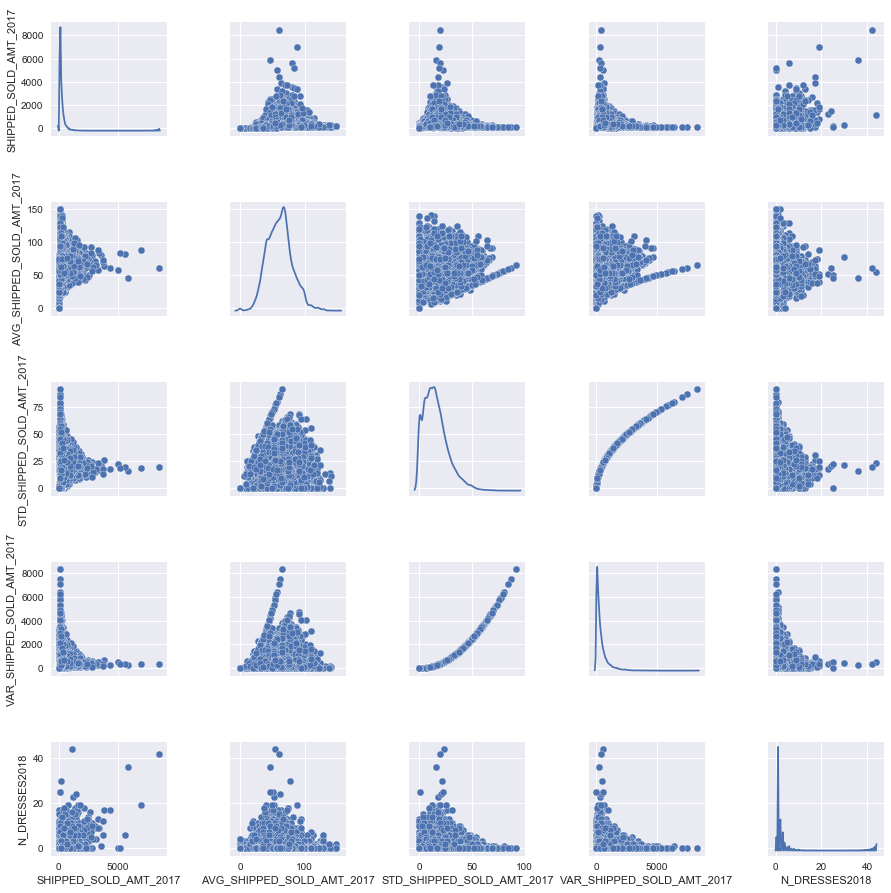

In [14]:
fts = NUMERIC_FTS[1:5]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,DISCOUNT_2017,AVG_DISCOUNT_2017,STD_DISCOUNT_2017,VAR_DISCOUNT_2017,N_DRESSES2018
DISCOUNT_2017,1.000000,0.235512,0.097960,0.001949,0.445384
AVG_DISCOUNT_2017,0.235512,1.000000,-0.138253,-0.159636,0.039535
STD_DISCOUNT_2017,0.097960,-0.138253,1.000000,0.933496,0.045909
VAR_DISCOUNT_2017,0.001949,-0.159636,0.933496,1.000000,-0.000842
N_DRESSES2018,0.445384,0.039535,0.045909,-0.000842,1.000000


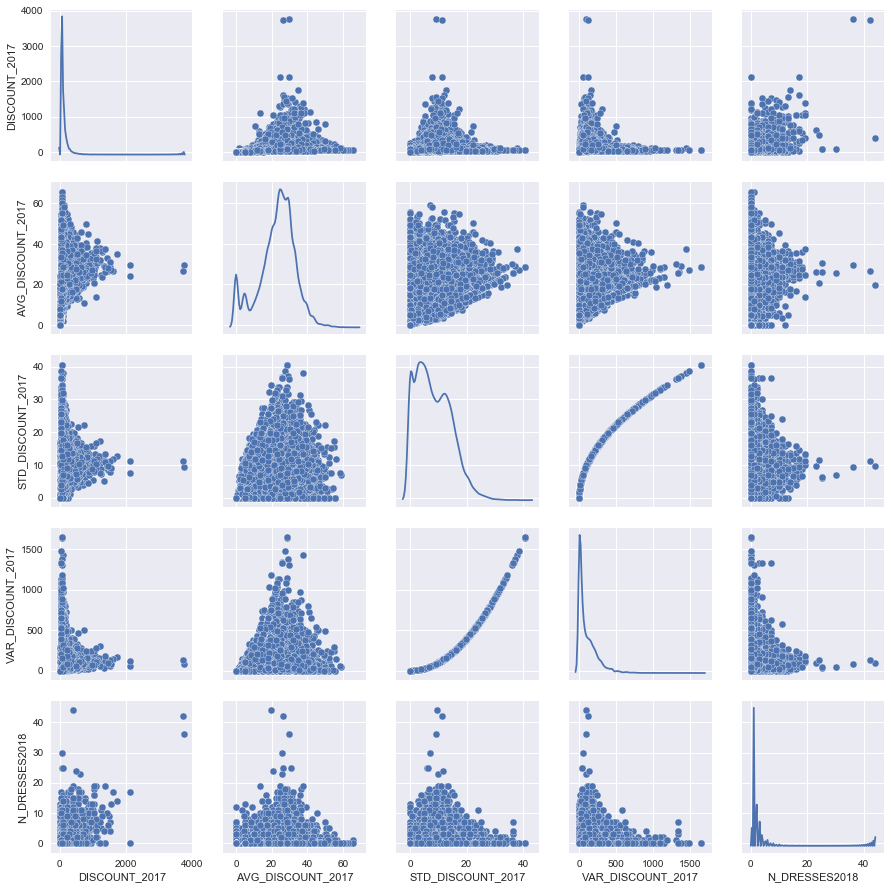

In [15]:
fts = NUMERIC_FTS[5:]
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

## Categorical Fts Correlation/Scatter Matrix

In [14]:
#fts = CATEG_FTS[0:3]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [15]:
#fts = CATEG_FTS[3:6]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [16]:
#fts = CATEG_FTS[6:9]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [17]:
#fts = CATEG_FTS[9:12]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#sns.pairplot(DF4,vars=fts,diag_kind='kde');

In [18]:
#fts = CATEG_FTS[12:15]+['N_KNITTOPS2018']
#display(DFPants[fts].corr())
#g = sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);

,ENDUSE_%_CORE_2017,ENDUSE_%_WEAREVER_2017,ENDUSE_%_PUREJILL_2017,N_DRESSES2018
ENDUSE_%_CORE_2017,1.000000,-0.701414,-0.518063,-0.008496
ENDUSE_%_WEAREVER_2017,-0.701414,1.000000,-0.246272,0.005225
ENDUSE_%_PUREJILL_2017,-0.518063,-0.246272,1.000000,0.005300
N_DRESSES2018,-0.008496,0.005225,0.005300,1.000000


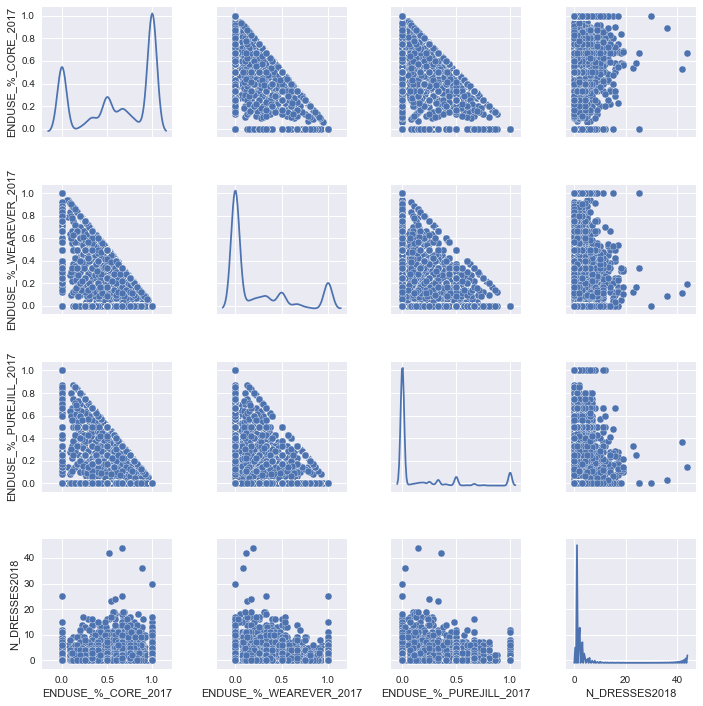

In [16]:
fts = CATEG_FTS[15:18]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_JJC_2017,PAYTYPE_%_VISA_2017,PAYTYPE_%_MC_2017,N_DRESSES2018
PAYTYPE_%_JJC_2017,1.000000,-0.612748,-0.361719,0.062513
PAYTYPE_%_VISA_2017,-0.612748,1.000000,-0.172370,-0.036239
PAYTYPE_%_MC_2017,-0.361719,-0.172370,1.000000,-0.019097
N_DRESSES2018,0.062513,-0.036239,-0.019097,1.000000


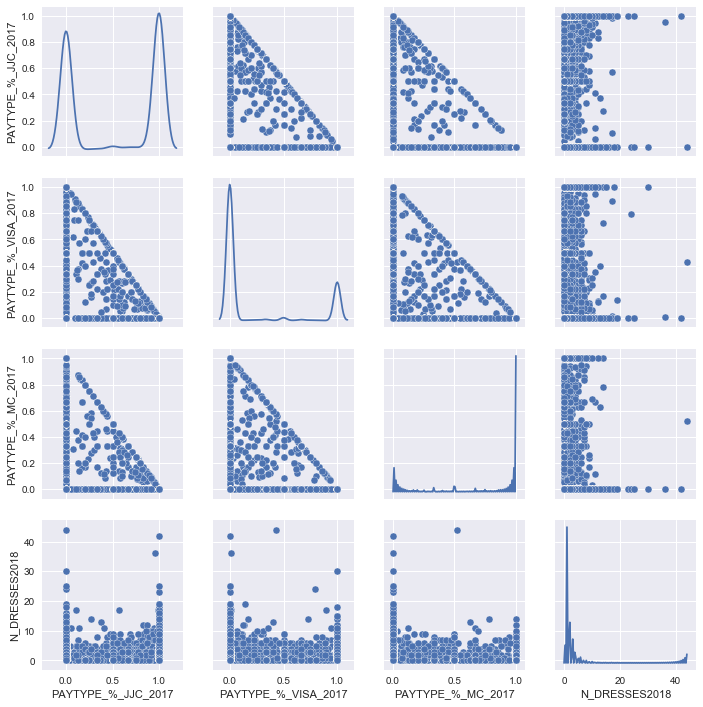

In [17]:
fts = CATEG_FTS[18:21]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_AMEX_2017,PAYTYPE_%_DISC_2017,PAYTYPE_%_DEBIT_2017,N_DRESSES2018
PAYTYPE_%_AMEX_2017,1.000000,-0.035513,-0.035993,-0.017146
PAYTYPE_%_DISC_2017,-0.035513,1.000000,-0.018509,-0.008193
PAYTYPE_%_DEBIT_2017,-0.035993,-0.018509,1.000000,-0.017834
N_DRESSES2018,-0.017146,-0.008193,-0.017834,1.000000


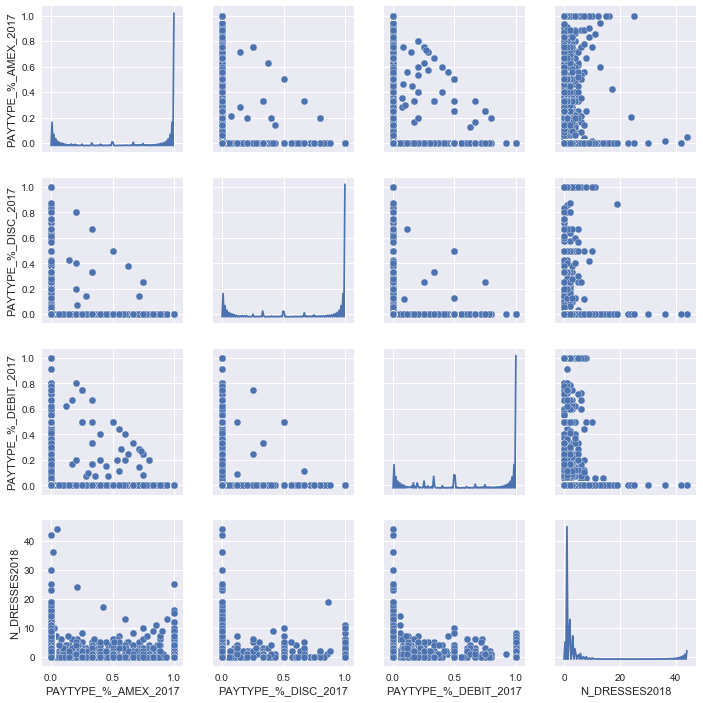

In [18]:
fts = CATEG_FTS[21:24]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,PAYTYPE_%_CASH_2017,PAYTYPE_%_CK_2017,PAYTYPE_%_OTHER_2017,N_DRESSES2018
PAYTYPE_%_CASH_2017,1.000000,0.005904,-0.005489,-0.013890
PAYTYPE_%_CK_2017,0.005904,1.000000,0.000039,-0.003623
PAYTYPE_%_OTHER_2017,-0.005489,0.000039,1.000000,-0.013354
N_DRESSES2018,-0.013890,-0.003623,-0.013354,1.000000


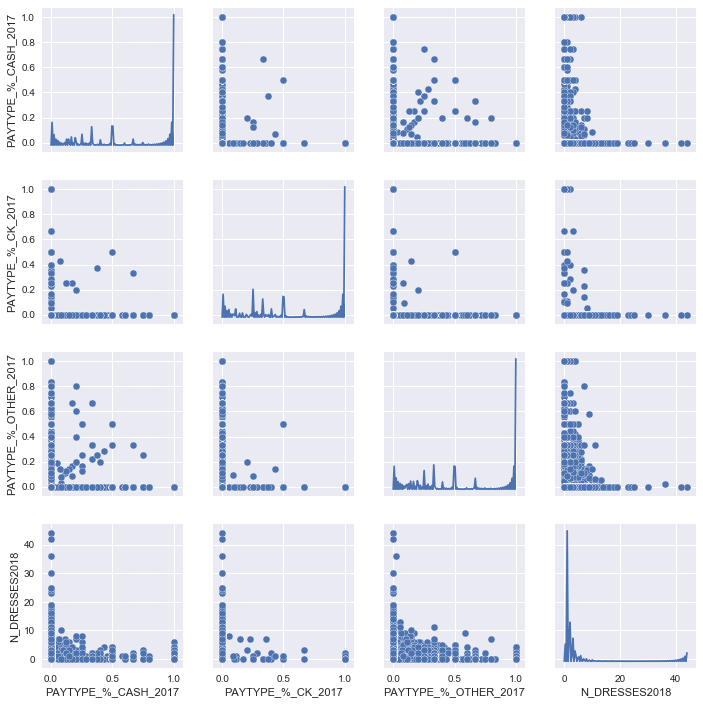

In [19]:
fts = CATEG_FTS[24:27]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde');

,FABRICCATEGORY_%_COTTON/COTTONBL_2017,FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,FABRICCATEGORY_%_LINEN/LINENBL_2017,N_DRESSES2018
FABRICCATEGORY_%_COTTON/COTTONBL_2017,1.000000,-0.292299,-0.157945,0.014673
FABRICCATEGORY_%_SYNTHETIC/SYNBLEND_2017,-0.292299,1.000000,-0.276850,-0.007786
FABRICCATEGORY_%_LINEN/LINENBL_2017,-0.157945,-0.276850,1.000000,-0.024568
N_DRESSES2018,0.014673,-0.007786,-0.024568,1.000000


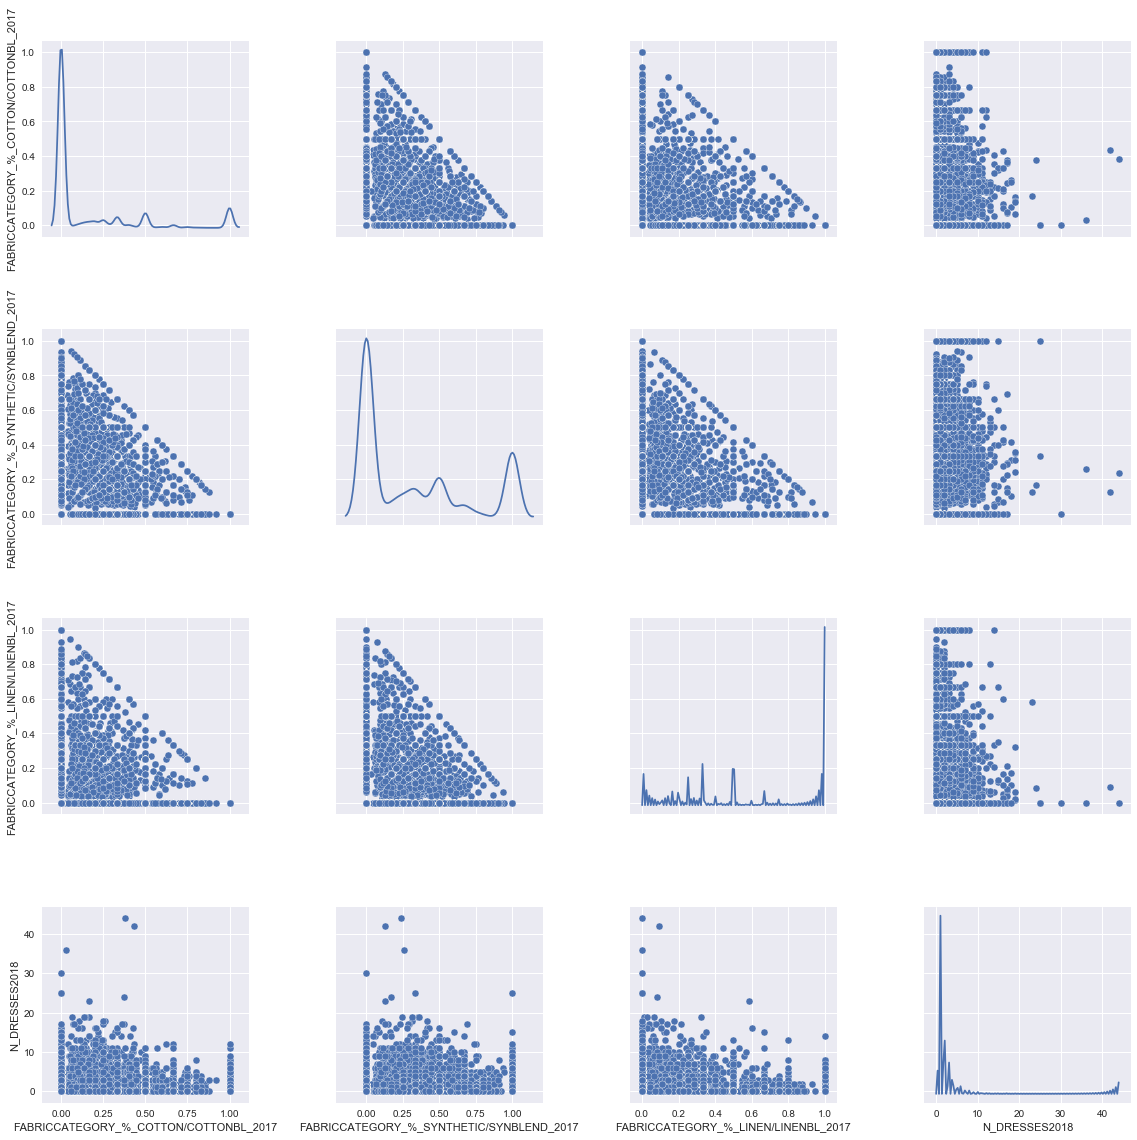

In [20]:
fts = CATEG_FTS[27:30]+['N_DRESSES2018']
display(DF4[fts].corr())
sns.pairplot(DF4,vars=fts,diag_kind='kde',size=4);